#  Project - Fake News Detection

In [2]:
# import neccesary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# DataFrame
true=pd.read_csv("P:\\True.csv")
fake=pd.read_csv("P:\\Fake.csv")

In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
true.shape
# 21417 rows and 4 columns

(21417, 4)

In [10]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
fake.shape
# 23481 rows and 4 columns

(23481, 4)

In [14]:
# Label data 
true['label'] = 1
fake['label'] = 0

In [16]:
# Combine the data true news and false news
data = [true.loc[:15000][:], fake.loc[:17000][:]]

In [18]:
# Make dataframe of data
df = pd.concat(data)

In [20]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [22]:
df.shape

(32002, 5)

#  Check for null values

In [25]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Inference - No null values

#  Check for duplicate data

In [29]:
df.duplicated().sum()

178

In [31]:
# Drop duplicate value
df=df.drop_duplicates()
df.duplicated().sum()

0

Inference - All duplicate data droped

#  Randomly Shuffle rows

In [35]:
df=df.sample(frac = 1)

#  Data Preprocessing

In [38]:
# Text Preprocessing
def text_summ(text):
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8652\1049160526.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8652\1049160526.py:7: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [46]:
df['text'] = df['text'].apply(text_summ)

In [48]:
df.head()

,title,text,subject,date,label
547,U.S. Senate candidate Moore's spokesman resign...,Reuters The communications director for U ...,politicsNews,"November 22, 2017",1
5577,Ex-Fox Exec Gets A Head Start On Painting Gre...,As the fallout from Gretchen Carlson s sexual ...,News,"July 6, 2016",0
9505,House drops military draft requirement for women,WASHINGTON Reuters The House of Representa...,politicsNews,"May 17, 2016",1
3240,Trump to host South Korea president June 29-30...,WASHINGTON Reuters U S President Donald T...,politicsNews,"June 13, 2017",1
2152,Trump Decides To Gut United Nations Funding B...,Donald Trump has decided to go through with hi...,News,"March 14, 2017",0


In [50]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

Drop columns which not helpful

In [53]:
df=df.drop(['title','subject','date'], axis = 1)

In [55]:
df.reset_index(inplace=True)
df.head()

,index,text,label
0,547,Reuters The communications director for U ...,1
1,5577,As the fallout from Gretchen Carlson s sexual ...,0
2,9505,WASHINGTON Reuters The House of Representa...,1
3,3240,WASHINGTON Reuters U S President Donald T...,1
4,2152,Donald Trump has decided to go through with hi...,0


#  Model Building

In [58]:
x = df['text']
y = df['label']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
# Splitting the datas
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xvector_train = vectorization.fit_transform(x_train)
xvector_test = vectorization.transform(x_test)

#  Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(random_state = 0)
RandomForest.fit(xvector_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
pred_rf = RandomForest.predict(xvector_test)

In [71]:
RandomForest.score(xvector_test, y_test)

0.9859225741578683

In [73]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4229
           1       0.99      0.98      0.98      3727

    accuracy                           0.99      7956
   macro avg       0.99      0.99      0.99      7956
weighted avg       0.99      0.99      0.99      7956



#  Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(xvector_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [77]:
pred_dt = DecisionTree.predict(xvector_test)

In [78]:
DecisionTree.score(xvector_test, y_test)

0.9933383609854198

In [79]:
print (classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4229
           1       0.99      0.99      0.99      3727

    accuracy                           0.99      7956
   macro avg       0.99      0.99      0.99      7956
weighted avg       0.99      0.99      0.99      7956



#  Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB()

In [87]:
NaiveBayes.fit(xvector_train, y_train)
pred_nb = NaiveBayes.predict(xvector_test)

In [89]:
NaiveBayes.score(xvector_test, y_test)

0.935771744595274

In [91]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4229
           1       0.94      0.92      0.93      3727

    accuracy                           0.94      7956
   macro avg       0.94      0.93      0.94      7956
weighted avg       0.94      0.94      0.94      7956



#  XGBoost

In [94]:
from xgboost import XGBClassifier

In [96]:
XGB = XGBClassifier()
XGB.fit(xvector_train, y_train)
pred_xgb = XGB.predict(xvector_test)

In [97]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, pred_xgb))

XGBoost Accuracy: 0.9962292609351433


In [98]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4229
           1       1.00      1.00      1.00      3727

    accuracy                           1.00      7956
   macro avg       1.00      1.00      1.00      7956
weighted avg       1.00      1.00      1.00      7956



#  Testing model

In [100]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(text_summ)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DecisionTree.predict(new_xv_test)
    
    return print("\n\nDT Prediction: {} ".format(output_lable(pred_DT[0])))

In [121]:
news = str(input()) 

 Trump says Russia probe will be fair, but timeline unclear: NYT","WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trump’s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the Republican president. But in an interview with the New York Times, Trump appeared to shrug off concerns about the investigation, which was prompted by U.S. intelligence agencies’ conclusion that Russia tried to help Trump defeat Democrat Hillary Clinton by hacking and releasing embarrassing emails and disseminating propaganda. “There’s been no collusion. But I think he’s going to be fair,” Trump said in what the Times described a

In [123]:
manual_testing(news)



DT Prediction: True News 


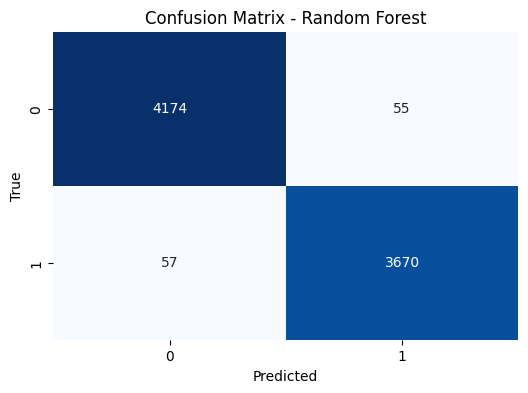

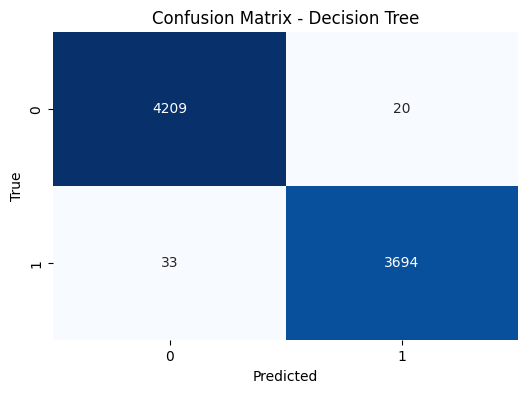

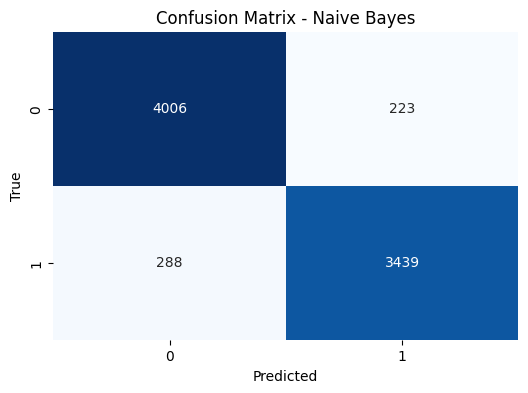

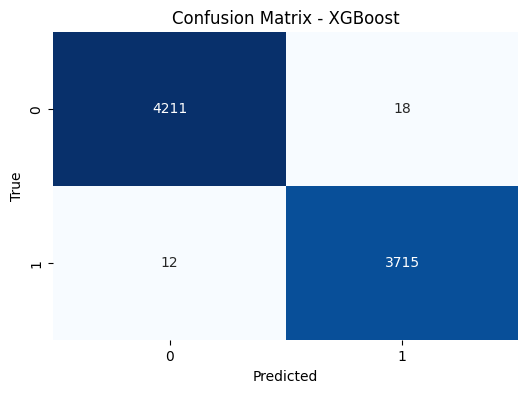

In [125]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion Matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8652\3659345877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=colors)


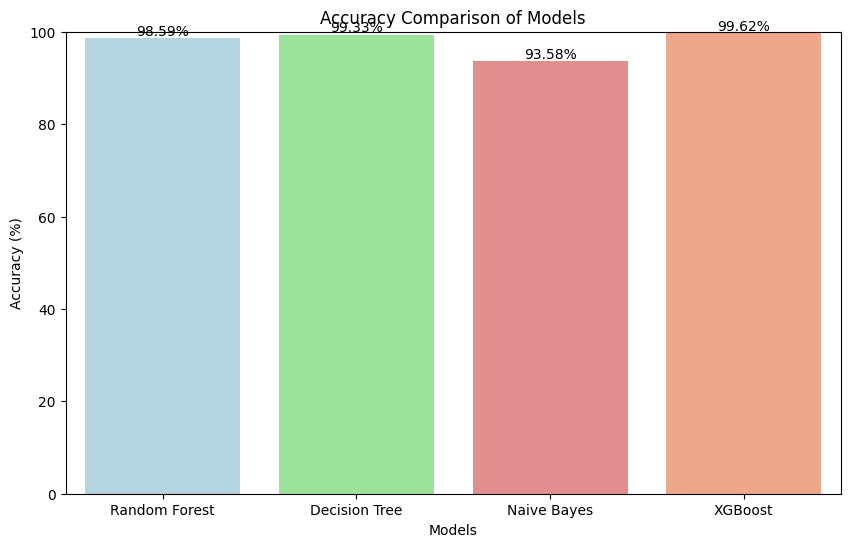

In [127]:
# Bar plot for Accuracy Comparison
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'XGBoost']
accuracies = [RandomForest.score(xvector_test, y_test)*100, DecisionTree.score(xvector_test, y_test)*100, NaiveBayes.score(xvector_test, y_test)*100, XGB.score(xvector_test, y_test)*100]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette=colors)
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Adjusted to 100 for accuracy percentage
for index, value in enumerate(accuracies):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()